In [140]:
import pandas as pd
import seaborn as sns
import pymc3 as pm
import numpy as np
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
%matplotlib inline

The code below loads the Excel file and selects the data within the first sheet. 

In [141]:
x1 = pd.ExcelFile('../data/response_data.xlsx')  
x1.sheet_names
df = x1.parse("Sheet1", header = 17, usecols = [0,1,2,3,4,5,6,7,8])
df.tail()

,Date,Contact,Length,Ethnicity,Response,Age,Meeting,Single,Match
248,2017-08-04,NaN,5,W,NaN,30.0,NaN,NaN,93.0
249,2017-08-05,NaN,20,W,1.0,33.0,NaN,NaN,90.0
250,2017-08-11,NaN,5,B,NaN,30.0,NaN,NaN,78.0
251,2017-08-16,NaN,17,A,NaN,29.0,NaN,NaN,59.0
252,2017-08-19,NaN,32,W,1.0,32.0,NaN,NaN,86.0


In [145]:
#Change W to White, U to Unknown, NaN to Unknown, L to Latina, A to Asian, B to Black
df.Ethnicity.replace( 'U', 'Unknown', inplace = True)
df.Ethnicity.fillna( 'Unknown' , inplace = True)
df.Response.fillna( 0 , inplace = True)
df.Ethnicity.replace( 'W', 'White', inplace = True)
df.Ethnicity.replace( 'L', 'Latina', inplace = True)
df.Ethnicity.replace( 'A', 'Asian', inplace = True)
df.Ethnicity.replace( 'B', 'Black', inplace = True)

# Visualize messages to all groups

In [146]:
sent =  df.loc[  (df.Contact != 1 ) , 'Response' ]   #messages sent by me 

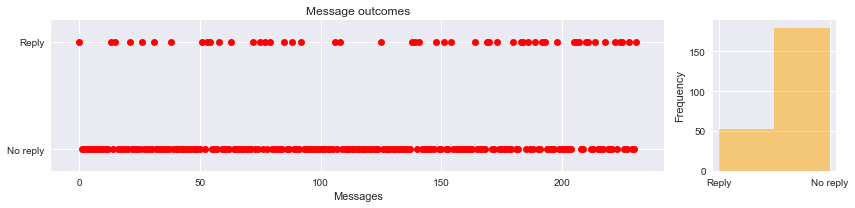

In [155]:
# Plot the data
fig = plt.figure(figsize=(12,3))
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1]) 
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

ax1.plot(range(len(sent)), sent, 'ro')
ax2.hist(-sent, bins=2, alpha = .5, color = 'orange')

ax1.yaxis.set(ticks=(0,1), ticklabels=('No reply', 'Reply'))
ax2.xaxis.set(ticks=(-1,0), ticklabels=('Reply', 'No reply'));

ax1.set(title='Message outcomes', xlabel='Messages', ylim=(-0.2, 1.2))
ax2.set(ylabel='Frequency')

fig.tight_layout()


# Visualize messages to White group 

In [148]:
sent_white =  df.loc[  (df.Contact != 1 ) & (df.Ethnicity == 'White' ), 'Response' ]   #messages sent by me to White group

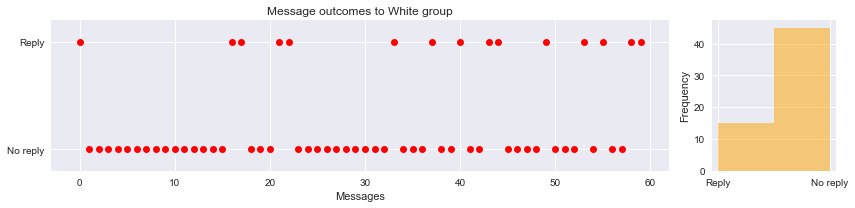

In [150]:
# Plot the data
fig = plt.figure(figsize=(12,3))
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1]) 
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

ax1.plot(range(len(sent_white)), sent_white, 'ro')
ax2.hist(-sent_white, bins=2, alpha = .5, color = 'orange')

ax1.yaxis.set(ticks=(0,1), ticklabels=('No reply', 'Reply'))
ax2.xaxis.set(ticks=(-1,0), ticklabels=('Reply', 'No reply'));

ax1.set(title='Message outcomes to White group', xlabel='Messages', ylim=(-0.2, 1.2))
ax2.set(ylabel='Frequency')

fig.tight_layout()

# Make function to plot outcomes

In [109]:
def plot_outcomes(str):
    group = df.loc[  (df.Contact != 1 ) & (df.Ethnicity == str ), 'Response' ]   #messages sent by me to group 
    
    fig = plt.figure(figsize=(12,2))
    gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1]) 
    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1])

    ax1.plot(range(len(group)), group, 'rx')
    ax2.hist(-group, bins=2, alpha = .5, color = 'orange')

    ax1.yaxis.set(ticks=(0,1), ticklabels=('No reply', 'Reply'))
    ax2.xaxis.set(ticks=(-1,0), ticklabels=('Reply', 'No reply'));

    ax1.set(title='Message outcomes to {} group'.format(str), xlabel='Messages', ylim=(-0.2, 1.2))
    ax2.set(ylabel='Frequency')

    
    return fig.tight_layout()

# Visualize messages to Groups 

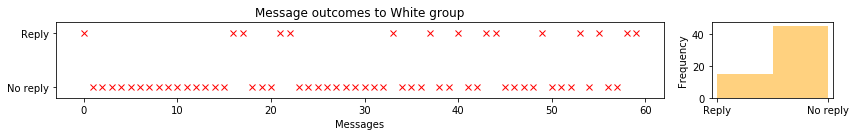

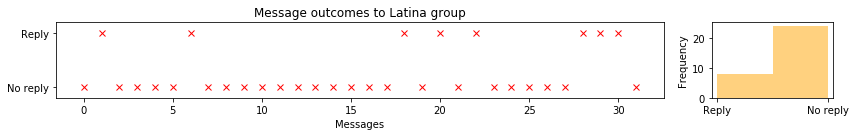

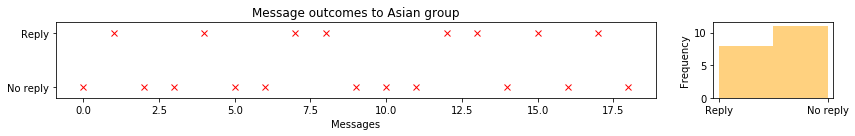

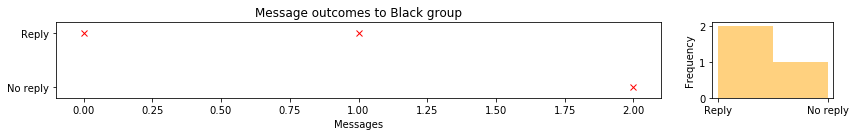

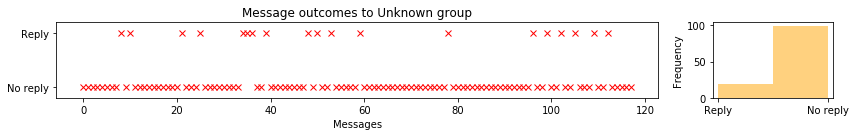

In [131]:
plot_outcomes("White"), plot_outcomes("Latina"), plot_outcomes("Asian"), plot_outcomes("Black"), plot_outcomes("Unknown");

In [174]:
with pm.Model():
    # prior 
    theta = pm.Uniform('theta', 0, 1) 
    
    # likelihood 
    Y = pm.Bernoulli('Y', p = theta, observed = sent )

    # Inference
    step = pm.NUTS() # Instantiate MCMC sampling algorithm
    trace = pm.sample(4000, step, tune=500)

100%|██████████| 4500/4500 [00:02<00:00, 1545.84it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121323390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1214c5278>]], dtype=object)

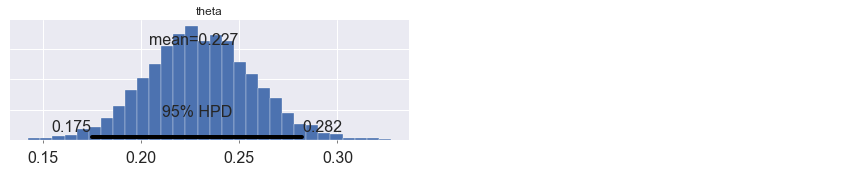

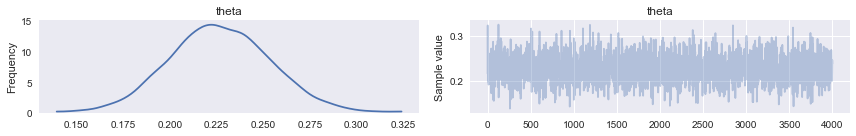

In [175]:
pm.plots.plot_posterior(trace)
pm.traceplot(trace)


theta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.227            0.027            0.001            [0.175, 0.282]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.175          0.209          0.226          0.245          0.282



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121b49a58>]], dtype=object)

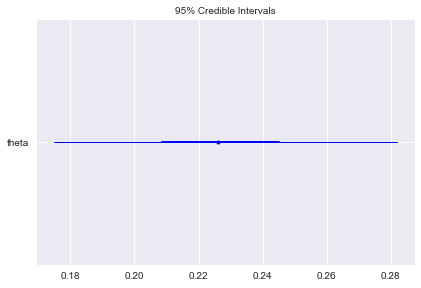

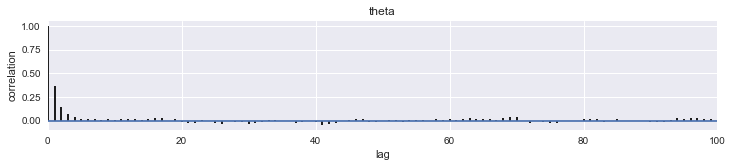

In [177]:
pm.summary(trace)
pm.plots.forestplot(trace)
pm.plots.autocorrplot(trace)

In [181]:
group = df.loc[  (df.Contact != 1 ) & (df.Ethnicity == "Black" ), 'Response' ]   #messages sent by me to group 

In [182]:
with pm.Model():
    # prior 
    theta = pm.Uniform('theta', 0, 1) 
    
    # likelihood 
    Y = pm.Bernoulli('Y', p = theta, observed = group )

    # Inference
    step = pm.NUTS() # Instantiate MCMC sampling algorithm
    trace = pm.sample(5000, step, tune=500)

100%|██████████| 5500/5500 [00:03<00:00, 1610.81it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1224cb940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x122544940>]], dtype=object)

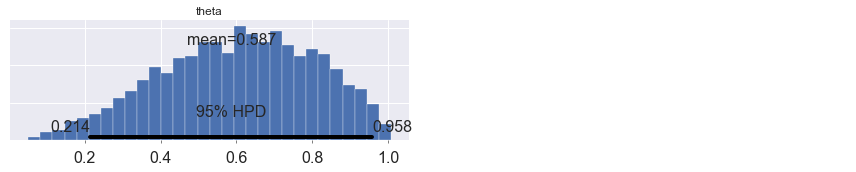

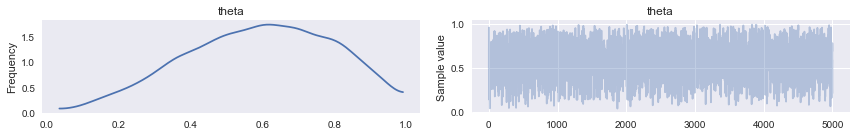

In [183]:
pm.plots.plot_posterior(trace)
pm.traceplot(trace)


theta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.587            0.203            0.004            [0.214, 0.958]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.176          0.440          0.597          0.746          0.932



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122c2da90>]], dtype=object)

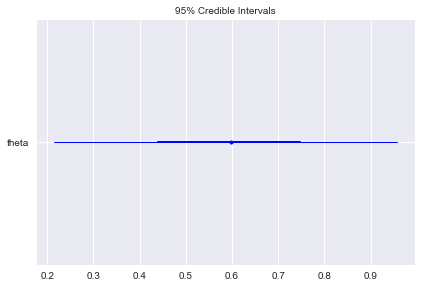

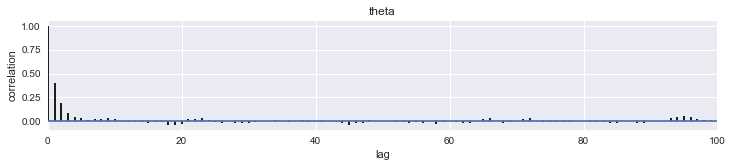

In [185]:
pm.summary(trace)
pm.plots.forestplot(trace)
pm.plots.autocorrplot(trace)